In [1]:
import torch
import matplotlib.pyplot as plt
from torch import optim, distributions, nn
from tqdm import tqdm
from gpzoo.kernels import RBF
from gpzoo.gp import VNNGP, GaussianLikelihood

/Users/priyankashrestha/Documents/stanford/research/engelhardt_research/GPzoo/gpzoo/utilities.py:2: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
N = 500
X = distributions.Uniform(-5, 5).sample((N, ))
y = 2*torch.sin(2*X) + distributions.Normal(0.0, 0.1).sample((N,))

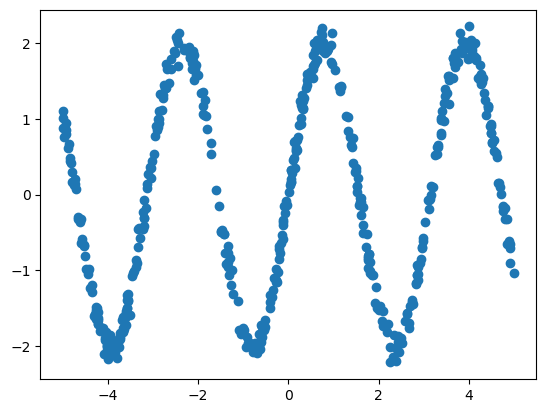

In [3]:
plt.scatter(X, y)

In [4]:
kernel = RBF(sigma=1.0, lengthscale=1.0)
gp = VNNGP(kernel, dim=1, M=50, jitter=1e-3)
model = GaussianLikelihood(gp)

In [5]:
X_train = X[:, None]
y_train = y

In [6]:
optimizer = optim.Adam(params= model.parameters(), lr=1e-3)

In [7]:
def fit(model, X, y, optimizer, epochs=1000, E=20):
  losses = []
  for it in tqdm(range(epochs)):
      optimizer.zero_grad()
      pY, qF, qU, pU = model.forward(X, E=E)
      ELBO = (pY.log_prob(y)).mean(axis=0).sum()
      ELBO -= torch.sum(distributions.kl_divergence(qU, pU))
      loss = -ELBO
      loss.backward()
      optimizer.step()
      losses.append(loss.item())

  print("finished Training")

  return losses

In [8]:
losses = fit(model, X_train, y_train, optimizer, epochs=100, E=20)

100%|██████████| 100/100 [01:01<00:00,  1.62it/s]

finished Training


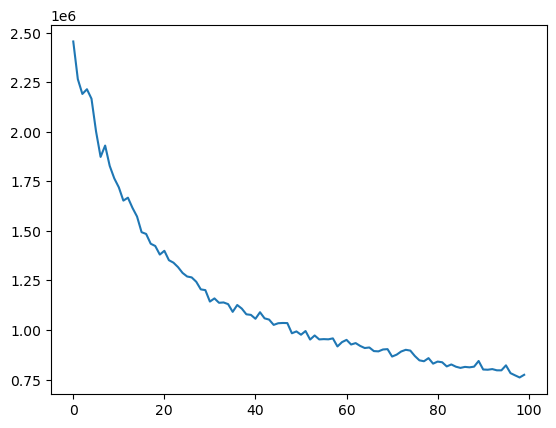

In [9]:
plt.plot(losses)